In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d


In [2]:
# Load an image from file and convert to grayscale
image_path = "img.png"  # Change this to your image file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize image for better processing speed


In [9]:
# Define Gaussian blur kernel (5x5)
gaussian_kernel = (1/273) * np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
])

# Define sharpening kernel
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Apply Gaussian blur using convolution
blurred_image = convolve2d(image, gaussian_kernel, mode='same', boundary='symm')

# Apply sharpening filter using convolution
sharpened_image = convolve2d(image, sharpen_kernel, mode='same', boundary='symm')

# Normalize images to 8-bit grayscale range
blurred_image = (blurred_image / blurred_image.max() * 255).astype(np.uint8)
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

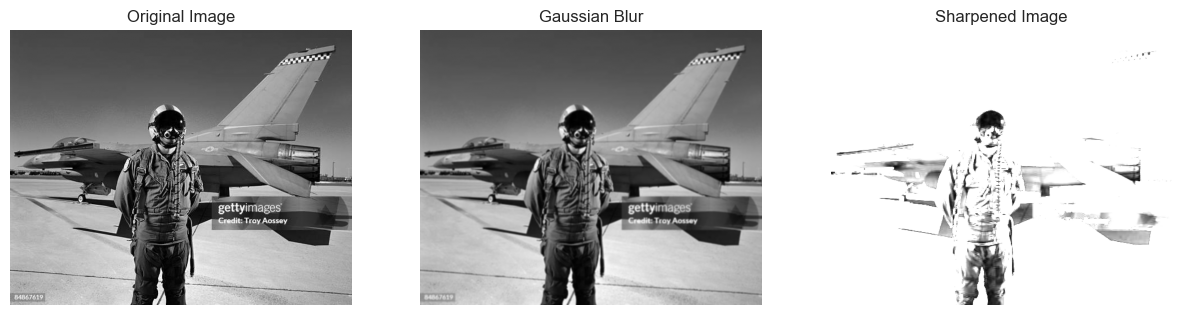

In [10]:
# Display original, blurred, and sharpened images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(blurred_image, cmap="gray")
ax[1].set_title("Gaussian Blur")
ax[1].axis("off")

ax[2].imshow(sharpened_image, cmap="gray")
ax[2].set_title("Sharpened Image")
ax[2].axis("off")

plt.show()

### Face recognition using SVD and Eigenvectors

In [12]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [13]:
# Load an image and convert to grayscale
image_path = "img_1.png"  # Change this to your image file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten image into a vector
image_vector = image.flatten().reshape(1, -1)

# Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=50)  # Keep 50 eigenfaces
compressed_image = svd.fit_transform(image_vector)

# Reconstruct the image using the top singular vectors
reconstructed_image = svd.inverse_transform(compressed_image)
shape_x, shape_y = image.shape
reconstructed_image = reconstructed_image.reshape(shape_x, shape_y)

MemoryError: Unable to allocate 2.20 GiB for an array with shape (4915200, 60) and data type float64

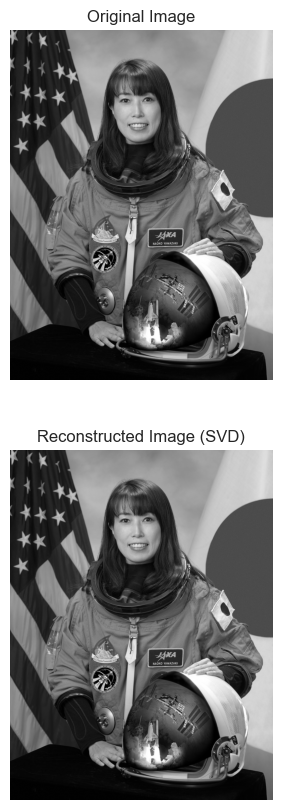

In [14]:
# Display original and reconstructed images
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(reconstructed_image, cmap="gray")
ax[1].set_title("Reconstructed Image (SVD)")
ax[1].axis("off")

plt.show()

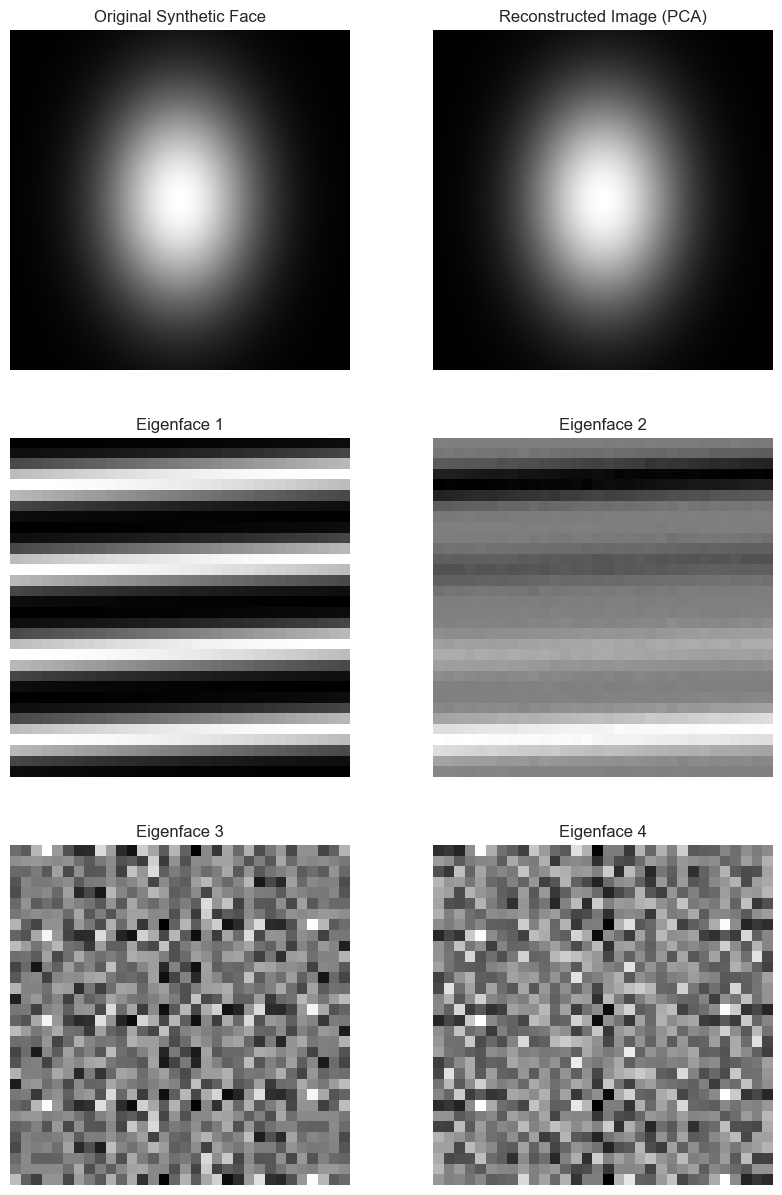

In [22]:
# Generate a synthetic face-like image as a placeholder
image_size = 256
x, y = np.meshgrid(np.linspace(-1, 1, image_size), np.linspace(-1, 1, image_size))
synthetic_face = np.exp(-5 * (x**2 + 0.5 * y**2)) * 255  # Elliptical Gaussian shape
synthetic_face = synthetic_face.astype(np.uint8)

# Reshape the image into multiple samples (dividing into smaller patches)
patch_size = 32  # Define size of each patch
num_patches = (image_size // patch_size) ** 2  # Number of patches
image_patches = synthetic_face.reshape(image_size // patch_size, patch_size, -1)  # Reshape into patches

# Flatten patches into feature vectors for PCA
image_patches = image_patches.reshape(num_patches, -1)

# Define PCA with appropriate number of components (must be ≤ num_patches)
num_components = min(10, num_patches)  # Use up to 10 eigenfaces
pca = PCA(n_components=num_components)
compressed_patches = pca.fit_transform(image_patches)

# Reconstruct the patches using PCA components
reconstructed_patches = pca.inverse_transform(compressed_patches)
reconstructed_image = reconstructed_patches.reshape(image_size, image_size)

# Extract top Eigenfaces (reshape for visualization)
eigenface_count = min(4, num_components)  # Limit visualization to 4 eigenfaces
eigenfaces = pca.components_[:eigenface_count].reshape(eigenface_count, patch_size, patch_size)

# Display original and reconstructed images with Eigenfaces
fig, ax = plt.subplots(3, 2, figsize=(10, 15))


# Original image (Top-left)
ax[0, 0].imshow(synthetic_face, cmap="gray")
ax[0, 0].set_title("Original Synthetic Face")
ax[0, 0].axis("off")

# Reconstructed image (Top-right)
ax[0, 1].imshow(reconstructed_image, cmap="gray")
ax[0, 1].set_title("Reconstructed Image (PCA)")
ax[0, 1].axis("off")

# Ensure we don't exceed available subplots
max_eigenfaces_to_display = min(4, eigenface_count)

# Eigenface visualization (Middle and Bottom rows)
for i in range(max_eigenfaces_to_display):
    row = 1 + (i // 2)  # Place eigenfaces in row 1 and 2
    col = i % 2  # Place eigenfaces in columns 0 and 1
    ax[row, col].imshow(eigenfaces[i], cmap="gray")
    ax[row, col].set_title(f"Eigenface {i+1}")
    ax[row, col].axis("off")

# Remove any unused subplots (if less than 4 eigenfaces are displayed)
for i in range(max_eigenfaces_to_display, 4):
    row = 1 + (i // 2)
    col = i % 2
    fig.delaxes(ax[row, col])

plt.show()